In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#reading data from .txt file
names=['w1','w2','w3','w4','labelling']
df=pd.read_csv('C:/Users/Siddhartha/data_banknote_authentication.txt',header=None,names=names)
print (df)

           w1        w2       w3       w4  labelling
0     3.62160   8.66610  -2.8073 -0.44699          0
1     4.54590   8.16740  -2.4586 -1.46210          0
2     3.86600  -2.63830   1.9242  0.10645          0
3     3.45660   9.52280  -4.0112 -3.59440          0
4     0.32924  -4.45520   4.5718 -0.98880          0
...       ...       ...      ...      ...        ...
1367  0.40614   1.34920  -1.4501 -0.55949          1
1368 -1.38870  -4.87730   6.4774  0.34179          1
1369 -3.75030 -13.45860  17.5932 -2.77710          1
1370 -3.56370  -8.38270  12.3930 -1.28230          1
1371 -2.54190  -0.65804   2.6842  1.19520          1

[1372 rows x 5 columns]


In [24]:
#counting number of rows in dataset
df.count()

w1           1372
w2           1372
w3           1372
w4           1372
labelling    1372
dtype: int64

In [25]:
#counting frequncy of classes
print(df['labelling'].value_counts())

0    762
1    610
Name: labelling, dtype: int64


In [26]:
#checking for null values
df.isnull().sum(axis=0)

w1           0
w2           0
w3           0
w4           0
labelling    0
dtype: int64

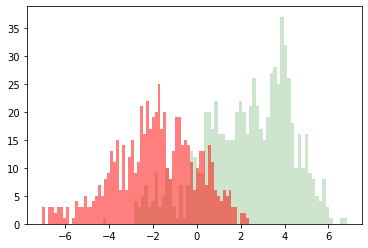

In [27]:
#Distribution of feature 1
x_0 = df.loc[df.labelling==0]
x_1 = df.loc[df.labelling==1]


plt.hist(x_0.w1,bins=70,alpha=0.2, color='g', label='fake')
plt.hist(x_1.w1,bins=70,alpha=0.5, color='r', label='real')
plt.show()

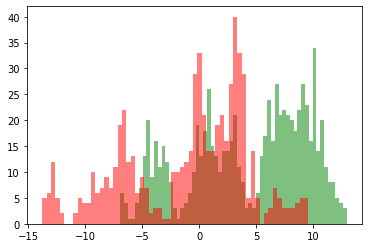

In [28]:
#Distribution of feature 2

plt.hist(x_0.w2,bins=60,alpha=0.5, color='g', label='fake')
plt.hist(x_1.w2,bins=60,alpha=0.5, color='r', label='real')
plt.show()

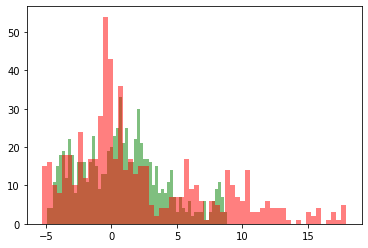

In [29]:
#Distribution of feature 3

plt.hist(x_0.w3,bins=60,alpha=0.5, color='g', label='fake')
plt.hist(x_1.w3,bins=60,alpha=0.5, color='r', label='real')
plt.show()

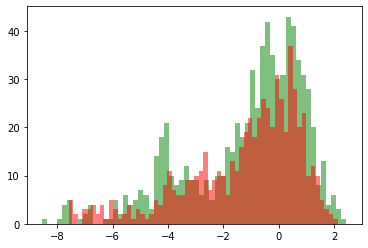

In [30]:
#Distribution of feature 4

plt.hist(x_0.w4,bins=60,alpha=0.5, color='g', label='fake')
plt.hist(x_1.w4,bins=60,alpha=0.5, color='r', label='real')
plt.show()

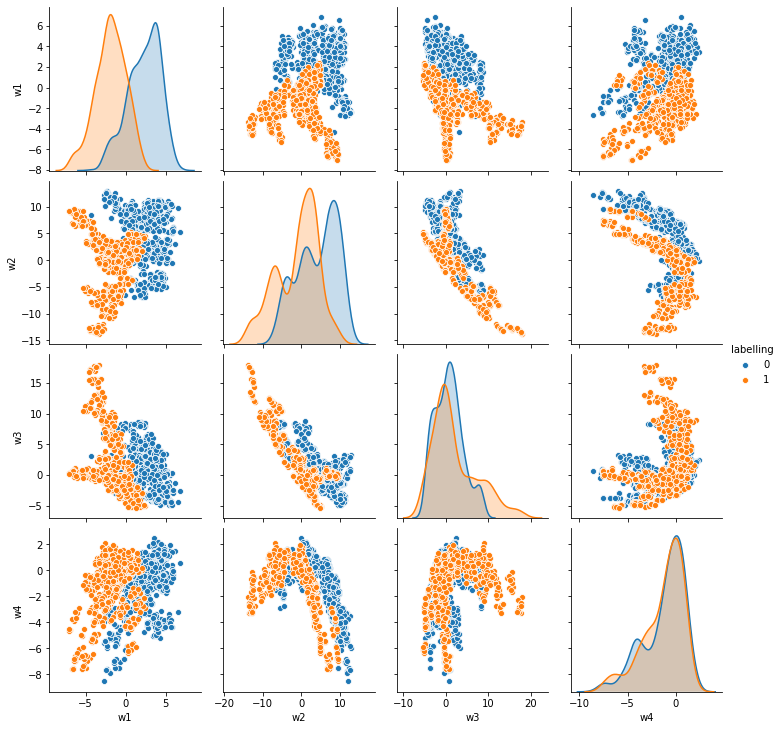

In [31]:
import seaborn as sns

#studying relationship between features
sns.pairplot(df,hue='labelling')

In [32]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#standardizing features
standardized_features=scaler.fit_transform(df.drop('labelling',axis=1))

#creating dataframe of standardized features
df_standardized=pd.DataFrame(standardized_features,columns=names[0:4])

#concatinating faetures and array
df_standardized=pd.concat([df_standardized,df['labelling']],axis=1)
df_standardized

,w1,w2,w3,w4,labelling
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


# Model1

In [33]:
#breaking data into X and Y
df0=df_standardized[df_standardized['labelling']==0].to_numpy()
df1=df_standardized[df_standardized['labelling']==1].to_numpy()


print("count of rows with label 0: ",df0.shape)
print("count of rows with label 1: ",df1.shape)

count of rows with label 0:  (762, 5)
count of rows with label 1:  (610, 5)


In [34]:
#extracting train dataset
train=np.concatenate([df0[0:381],df1[0:305]],axis=0)
X_train=train[:,0:train.shape[1]-1]
Y_train=train[:,train.shape[1]-1]

print(X_train)
print(X_train.shape)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.45328391 -2.6590249   3.75583765 -0.67917881]
 [-1.41988872 -1.44219985  2.11810596  0.33423993]
 [-1.07763198 -0.29697641  0.09237012  1.03058173]]
(686, 4)


In [35]:
#extracting test dataset
test=np.concatenate([df0[381:],df1[305:]],axis=0)
X_test=train[:,0:test.shape[1]-1]
Y_test=train[:,test.shape[1]-1]

print(X_test)
print(X_test.shape)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.45328391 -2.6590249   3.75583765 -0.67917881]
 [-1.41988872 -1.44219985  2.11810596  0.33423993]
 [-1.07763198 -0.29697641  0.09237012  1.03058173]]
(686, 4)


In [36]:
#training a gaussian naive bayes classifier

from sklearn.naive_bayes import GaussianNB
clf1=GaussianNB(priors=[0.5,0.5])
clf1.fit(X_train, Y_train)

GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09)

Accuracy of model1:  0.8498542274052479

Classification report: 
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       381
         1.0       0.83      0.83      0.83       305

    accuracy                           0.85       686
   macro avg       0.85      0.85      0.85       686
weighted avg       0.85      0.85      0.85       686



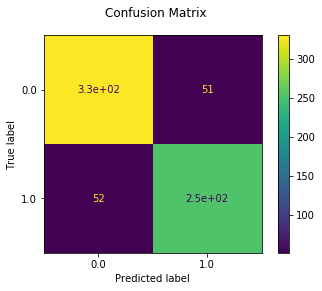

In [46]:
#evalutating test dataset
Y_pred1=clf1.predict(X_test)

#accuracy
from sklearn.metrics import accuracy_score,classification_report
acc1=accuracy_score(Y_test, Y_pred1)
print("Accuracy of model1: ",acc1)

#classification report
report=classification_report(Y_test,Y_pred1)
print("\nClassification report: \n",report)

#confusion matrix
from sklearn.metrics import plot_confusion_matrix
cm=plot_confusion_matrix(clf1,X_test,Y_test)

cm.figure_.suptitle("Confusion Matrix")
plt.show()

In [47]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#function to draw ROC curve
def plot_roc_curve(model, testX, testy):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(testy))]

    # predict probabilities
    m_probs = model.predict_proba(testX)
    print (m_probs)
    # keep probabilities for the positive outcome only
    m_probs = m_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    m_auc = roc_auc_score(testy, m_probs)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Our Model: ROC AUC=%.3f' % (m_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    m_fpr, m_tpr, _ = roc_curve(testy, m_probs)

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(m_fpr, m_tpr, marker='.', label='Logistic')
    print (m_probs)

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

[[9.96362445e-01 3.63755491e-03]
 [9.98887392e-01 1.11260801e-03]
 [9.79833081e-01 2.01669195e-02]
 ...
 [2.46046329e-07 9.99999754e-01]
 [3.13864030e-04 9.99686136e-01]
 [6.14515944e-02 9.38548406e-01]]
No Skill: ROC AUC=0.500
Our Model: ROC AUC=0.934
[3.63755491e-03 1.11260801e-03 2.01669195e-02 4.33544316e-03
 7.84058483e-01 1.30213381e-03 8.49783108e-03 7.65615956e-01
 8.69758632e-03 3.99137861e-02 5.97136448e-02 1.77308423e-02
 2.83858392e-02 4.79825665e-01 4.91109351e-03 9.37638863e-03
 2.62080531e-02 3.08492130e-01 8.11796385e-01 3.12580151e-04
 2.08959250e-04 7.84065911e-01 1.92847520e-03 7.59228551e-02
 1.28645035e-03 9.17020562e-01 6.25084701e-01 2.69334206e-01
 6.19560828e-05 7.08375255e-03 7.50126639e-01 1.23421589e-01
 1.70240049e-03 3.21711367e-01 9.69747914e-01 1.98869636e-02
 1.56992754e-02 1.29667427e-02 2.45933487e-03 3.92863577e-03
 1.80871628e-03 1.68599196e-01 1.69073391e-01 1.29832656e-01
 1.05490388e-02 2.35264470e-01 2.89052968e-02 2.35264470e-01
 3.76198227e-03

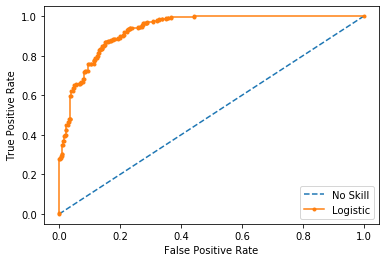

In [48]:
#plotting ROC curve
plot_roc_curve(clf1, X_test, Y_test)
#print (ns_probs)

# Model2

In [49]:
#training model with prior probablities [0.1,0.9]
clf2=GaussianNB(priors=[0.1,0.9])
clf2.fit(X_train, Y_train)

GaussianNB(priors=[0.1, 0.9], var_smoothing=1e-09)

In [50]:
clf2.class_prior_

array([0.1, 0.9])

Accuracy of model2:  0.7973760932944607

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      0.64      0.78       381
         1.0       0.69      0.99      0.81       305

    accuracy                           0.80       686
   macro avg       0.84      0.82      0.80       686
weighted avg       0.86      0.80      0.79       686



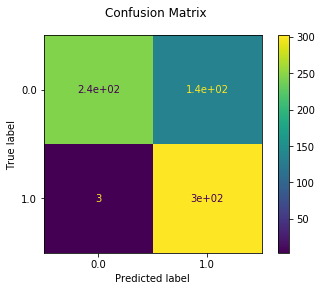

In [51]:
#evalutating test dataset
Y_pred2=clf2.predict(X_test)

#accuracy
acc2=accuracy_score(Y_test, Y_pred2)
print("Accuracy of model2: ",acc2)

#classification report
report2=classification_report(Y_test,Y_pred2)
print("\nClassification report: \n",report2)

#confusion matrix
cm2=plot_confusion_matrix(clf2,X_test,Y_test)

cm2.figure_.suptitle("Confusion Matrix")
plt.show()

[[9.68187756e-01 3.18122439e-02]
 [9.90074870e-01 9.92512988e-03]
 [8.43712435e-01 1.56287565e-01]
 ...
 [2.73384870e-08 9.99999973e-01]
 [3.48835133e-05 9.99965116e-01]
 [7.22247267e-03 9.92777527e-01]]
No Skill: ROC AUC=0.500
Our Model: ROC AUC=0.934
[3.18122439e-02 9.92512988e-03 1.56287565e-01 3.77110361e-02
 9.70306982e-01 1.15983831e-02 7.16120995e-02 9.67103660e-01
 7.31859480e-02 2.72281720e-01 3.63686454e-01 1.39753940e-01
 2.08194376e-01 8.92494985e-01 4.25289331e-02 7.84991866e-02
 1.94990010e-01 8.00599647e-01 9.74887337e-01 2.80620405e-03
 1.87749469e-03 9.70308246e-01 1.70925760e-02 4.25104511e-01
 1.14601102e-02 9.90045849e-01 9.37521173e-01 7.68386250e-01
 5.57328506e-04 6.03346094e-02 9.64308971e-01 5.58926011e-01
 1.51157400e-02 8.10199414e-01 9.96545770e-01 1.54415784e-01
 1.25527902e-01 1.05732623e-01 2.17069368e-02 3.42803227e-02
 1.60462614e-02 6.46030705e-01 6.46803046e-01 5.73167270e-01
 8.75525844e-02 7.34661758e-01 2.11288757e-01 7.34661758e-01
 3.28686308e-02

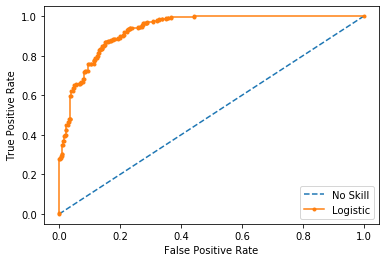

In [52]:
#ROC curve
plot_roc_curve(clf2,X_test, Y_test) 